- [데이터 불러오기](#데이터-|불러오기)
- [금리, 가격 지수 데이터들 - 독립변수들](#금리,-가격-지수-데이터들---독립변수들)
- [XGB](#XGB)
- [LSTM](#LSTM)

# 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 한글 깨짐 방지
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
# 데이터 불러오기
df_1 = pd.read_csv('전세가평균_filled_by_지수.csv')
df_2 = pd.read_csv('매매가평균_filled_by_지수.csv')

벨라미아 오피스텔
22


<Axes: xlabel='계약월', ylabel='월별평균 매매가'>

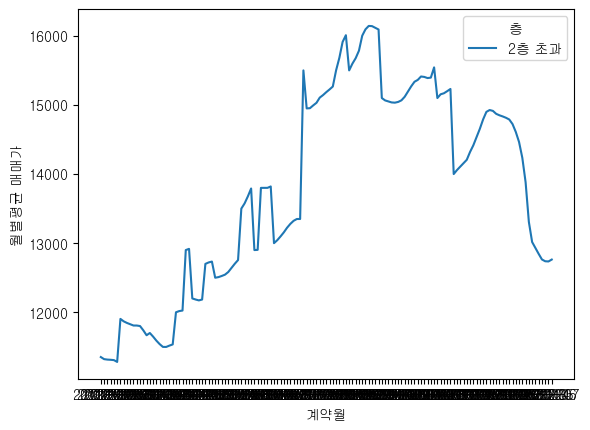

In [4]:
import random

# 리스트 생성
my_list_1 = df_2['건물명'].unique()
random_element_1 = random.choice(my_list_1)

my_list_2 = df_2.loc[df_2['건물명'] == random_element_1]['면적'].unique()
random_element_2 = random.choice(my_list_2)

print(random_element_1)
print(random_element_2)

sns.lineplot(x='계약월', y='월별평균 매매가', hue='층', data=df_2.loc[(df_2['건물명'] == f'{random_element_1}') & (df_2['면적'] == random_element_2)])

In [5]:
# 층 없애기
df_1_adj = df_1.groupby(['주소', '건물명', '건축년도', '면적', '계약월', '건물용도'])['월별평균 전세가'].agg(['mean']).reset_index()
df_2_adj = df_2.groupby(['주소', '건물명', '건축년도', '면적', '계약월', '건물용도'])['월별평균 매매가'].agg(['mean']).reset_index()
df_1_adj = df_1_adj.rename(columns={'mean': '월별평균 전세가'})
df_2_adj = df_2_adj.rename(columns={'mean': '월별평균 매매가'})

In [6]:
# 구 컬럼 생성
df_1_adj['구'] = df_1_adj['주소'].apply(lambda x: x[:3])
df_2_adj['구'] = df_2_adj['주소'].apply(lambda x: x[:3])

In [7]:
# 공통 인덱스 형성
df_1_adj['idx'] = df_1_adj['건물명'] + df_1_adj['계약월'] + df_1_adj['주소'].apply(lambda x: str(x)) + df_1_adj['건축년도'].apply(lambda x: str(int(x))) + df_1_adj['면적'].apply(lambda x: str(x))
df_2_adj['idx'] = df_2_adj['건물명'] + df_2_adj['계약월'] + df_2_adj['주소'].apply(lambda x: str(x)) + df_2_adj['건축년도'].apply(lambda x: str(int(x))) + df_2_adj['면적'].apply(lambda x: str(x))

In [8]:
# 최종 df
df_3 = df_1_adj.merge(df_2_adj[['idx', '월별평균 매매가']], how='inner', on = 'idx')

In [9]:
temp = df_3[['월별평균 전세가']].loc[~df_3['월별평균 전세가'].isna()]    
df_3['월별평균 전세가'].loc[temp.index] = df_3['월별평균 전세가'].loc[temp.index].apply(lambda x: round(x) if x != np.nan else x)
temp = df_3[['월별평균 매매가']].loc[~df_3['월별평균 매매가'].isna()]
df_3['월별평균 매매가'].loc[temp.index] = df_3['월별평균 매매가'].loc[temp.index].apply(lambda x: round(x) if x != np.nan else x)

C:\Users\Jae\AppData\Local\Temp\ipykernel_21944\1306248258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['월별평균 전세가'].loc[temp.index] = df_3['월별평균 전세가'].loc[temp.index].apply(lambda x: round(x) if x != np.nan else x)
C:\Users\Jae\AppData\Local\Temp\ipykernel_21944\1306248258.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['월별평균 매매가'].loc[temp.index] = df_3['월별평균 매매가'].loc[temp.index].apply(lambda x: round(x) if x != np.nan else x)


In [10]:
df_3 = df_3.drop('idx', axis=1)

In [11]:
df_3

,주소,건물명,건축년도,면적,계약월,건물용도,월별평균 전세가,구,월별평균 매매가
0,강남구 개포동 1164-12,새롬(1164-12),2000.0,74,2012-05,아파트,23090.0,강남구,38000.0
1,강남구 개포동 1164-12,새롬(1164-12),2000.0,74,2012-06,아파트,22805.0,강남구,37526.0
2,강남구 개포동 1164-12,새롬(1164-12),2000.0,74,2012-07,아파트,22695.0,강남구,37324.0
3,강남구 개포동 1164-12,새롬(1164-12),2000.0,74,2012-08,아파트,22552.0,강남구,36700.0
4,강남구 개포동 1164-12,새롬(1164-12),2000.0,74,2012-09,아파트,22600.0,강남구,36074.0
...,...,...,...,...,...,...,...,...,...
2952142,중랑구 중화동 454-0,동양엔파트2차,2013.0,96,2023-03,아파트,45000.0,중랑구,64019.0
2952143,중랑구 중화동 454-0,동양엔파트2차,2013.0,96,2023-04,아파트,44677.0,중랑구,63699.0
2952144,중랑구 중화동 454-0,동양엔파트2차,2013.0,96,2023-05,아파트,44480.0,중랑구,63515.0
2952145,중랑구 중화동 454-0,동양엔파트2차,2013.0,96,2023-06,아파트,44426.0,중랑구,63480.0


In [12]:
-

SyntaxError: invalid syntax (476313318.py, line 1)

# 금리, 가격 지수 데이터들 - 독립변수들

In [13]:
namelist_1 = ['주요지역별_전세수급동향_20230823161732', '주요지역별_월세수급동향_20230823162501', 
              '주요지역별_매매수급동향_20230823162619', '유형별_전세가격지수_20230825194426', 
              '유형별_매매가격지수_20230825194549']

namelist_2 = ['전세수급', '월세수급', '매매수급', '전세지수', '매매지수']
namelist_3 = ['예금은행_대출금리_신규취급액_기준__20230828162449', '지역별_전월세전환율_20230823161834']

temp = pd.read_csv('소비자물가지수_2020100__20230823163026.csv', encoding='euc-kr').T
temp = temp.iloc[1:,:].reset_index().rename(columns={'index': '계약월'}).rename(columns={0: 'CPI'})

for i in range(5):
    
    # 각 데이터 불러오기
    temp_1 = pd.read_csv(f'{namelist_1[i]}.csv', encoding='euc-kr').T
    if i < 3:
        # 불필요한 행 제거
        temp_1 = temp_1.iloc[:, [2,3]].iloc[1:, :]
    else:
        temp_1 = temp_1.iloc[1:, :]
    # 컬럼명 변경
    temp_1.columns = temp_1.iloc[0]
    # 불필요한 행 제거 2, 계약월 컬럼명으로 변경
    
    temp_1 = temp_1.rename(columns={'서울': f'{namelist_2[i]}-서울'})[[f'{namelist_2[i]}-서울']].iloc[1:, :].reset_index().rename(columns={'index': '계약월'})
    temp = temp.merge(temp_1, how='left', on='계약월')
  

# 나머지 데이터 처리 -1
t=pd.read_csv('월별_소비자물가_등락률_20230829194840.csv', encoding='euc-kr').T.iloc[1:,:].reset_index().rename(columns={'index': '계약월'}).rename(columns={1: '전년도동월 대비 CPI 등락률'}).drop(0, axis=1)
temp = temp.merge(t, how='left', on='계약월')

# 나머지 데이터 처리 -2
namelist_4=['예금은행_대출금리_신규취급액_기준__20230828162449']

for j in range(len(namelist_4)):
    t=pd.read_csv(f'{namelist_4[j]}.csv', encoding='euc-kr')
    t = t.replace('-', np.nan)
    t = t.T
    t.columns = t.iloc[0]
    t = t.iloc[1:,:].reset_index().rename(columns={'index': '계약월'})
    temp = temp.merge(t, how='left', on='계약월')

ind = temp

In [14]:
# 날짜 형식 변형
ind['계약월'] = ind['계약월'].apply(lambda x: x[:4] + '-' + x[-2:])

In [15]:
# 수치형 데이터타입을 float으로 변경
ind = pd.concat([ind[['계약월']], ind.iloc[:,1:].astype(float)], axis=1)

In [16]:
ind_t = ind.reset_index().merge(ind[['계약월', '전세수급-서울', '매매수급-서울', '주택담보대출 (연리%)', '전세자금대출 (연리%)']].shift(6).reset_index()[['index','전세수급-서울', '매매수급-서울', '주택담보대출 (연리%)', '전세자금대출 (연리%)']], how='left', on='index').drop('index', axis=1)

In [17]:
# 컬럼명 변경
num = 6
ind_t = ind_t.rename(columns={'전세수급-서울_x': '전세수급-서울',
                     '매매수급-서울_x':'매매수급-서울',
                     '주택담보대출 (연리%)_x':'주택담보대출 (연리%)',
                     '전세자금대출 (연리%)_x':'전세자금대출 (연리%)',
                     '전세수급-서울_y':f'전세수급-서울-{num}개월 전',
                      '매매수급-서울_y':f'매매수급-서울-{num}개월 전',
                     '주택담보대출 (연리%)_y':f'주택담보대출 (연리%)-{num}개월 전',
                      '전세자금대출 (연리%)_y':f'전세자금대출 (연리%)-{num}개월 전'
                     })

In [18]:
df_t = df_3.merge(ind_t, how='left', on = '계약월')

In [19]:
df_t = df_t.loc[df_t['계약월']>='2016'].reset_index(drop=True)

In [20]:
print(ind_t.loc[(~ind_t['전세수급-서울'].isna()) & (ind_t['주택담보대출 (연리%)'] > 4.5)]['주택담보대출 (연리%)'].mean())
print(ind_t.loc[(~ind_t['전세수급-서울'].isna()) & (ind_t['주택담보대출 (연리%)'] > 4.5)]['매매수급-서울'].mean())

print(ind_t.loc[(~ind_t['전세수급-서울'].isna()) & (ind_t['주택담보대출 (연리%)'] > 4.5)]['전세자금대출 (연리%)'].mean())
print(ind_t.loc[(~ind_t['전세수급-서울'].isna()) & (ind_t['주택담보대출 (연리%)'] > 4.5)]['전세수급-서울'].mean())

4.6866666666666665
69.28333333333333
4.7700000000000005
68.28333333333333


In [21]:
-

SyntaxError: invalid syntax (476313318.py, line 1)

## 기간별 상관관계

In [80]:
ind_t.corr()

C:\Users\Jae\AppData\Local\Temp\ipykernel_21944\309757107.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ind_t.corr()


,CPI,전세수급-서울,월세수급-서울,매매수급-서울,전세지수-서울,매매지수-서울,전년도동월 대비 CPI 등락률,주택담보대출 (연리%),전세자금대출 (연리%),전세수급-서울-6개월 전,매매수급-서울-6개월 전,주택담보대출 (연리%)-6개월 전,전세자금대출 (연리%)-6개월 전
CPI,1.000000,-0.644655,0.148959,-0.097833,0.922357,0.809653,-0.093690,-0.747659,0.624151,-0.524694,0.066415,-0.764307,0.477603
전세수급-서울,-0.644655,1.000000,0.650151,0.571111,-0.269801,-0.458711,-0.510227,-0.492740,-0.732577,0.643874,0.134039,-0.389429,-0.573141
월세수급-서울,0.148959,0.650151,1.000000,0.633691,0.500635,0.405454,0.081661,-0.258977,-0.393066,0.379734,0.378149,-0.507904,-0.487653
매매수급-서울,-0.097833,0.571111,0.633691,1.000000,0.444372,0.248498,-0.341046,-0.747154,-0.801100,0.292838,0.500436,-0.787794,-0.610157
전세지수-서울,0.922357,-0.269801,0.500635,0.444372,1.000000,0.788782,-0.258697,-0.842240,-0.064192,-0.054956,0.678393,-0.909970,-0.560787
매매지수-서울,0.809653,-0.458711,0.405454,0.248498,0.788782,1.000000,0.148567,-0.472779,0.144803,-0.343045,0.455667,-0.532462,-0.128147
전년도동월 대비 CPI 등락률,-0.093690,-0.510227,0.081661,-0.341046,-0.258697,0.148567,1.000000,0.644045,0.716670,-0.146272,0.006189,0.534533,0.286141
주택담보대출 (연리%),-0.747659,-0.492740,-0.258977,-0.747154,-0.842240,-0.472779,0.644045,1.000000,0.924086,-0.182267,-0.346611,0.926219,0.583218
전세자금대출 (연리%),0.624151,-0.732577,-0.393066,-0.801100,-0.064192,0.144803,0.716670,0.924086,1.000000,-0.402407,-0.453343,0.829274,0.659445
전세수급-서울-6개월 전,-0.524694,0.643874,0.379734,0.292838,-0.054956,-0.343045,-0.146272,-0.182267,-0.402407,1.000000,0.518642,-0.414660,-0.685632


In [81]:
ind_t.corr()[['전세수급-서울', '매매수급-서울', '전세수급-서울-6개월 전', '매매수급-서울-6개월 전']]

C:\Users\Jae\AppData\Local\Temp\ipykernel_21944\1189657951.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ind_t.corr()[['전세수급-서울', '매매수급-서울', '전세수급-서울-6개월 전', '매매수급-서울-6개월 전']]


,전세수급-서울,매매수급-서울,전세수급-서울-6개월 전,매매수급-서울-6개월 전
CPI,-0.644655,-0.097833,-0.524694,0.066415
전세수급-서울,1.000000,0.571111,0.643874,0.134039
월세수급-서울,0.650151,0.633691,0.379734,0.378149
매매수급-서울,0.571111,1.000000,0.292838,0.500436
전세지수-서울,-0.269801,0.444372,-0.054956,0.678393
매매지수-서울,-0.458711,0.248498,-0.343045,0.455667
전년도동월 대비 CPI 등락률,-0.510227,-0.341046,-0.146272,0.006189
주택담보대출 (연리%),-0.492740,-0.747154,-0.182267,-0.346611
전세자금대출 (연리%),-0.732577,-0.801100,-0.402407,-0.453343
전세수급-서울-6개월 전,0.643874,0.292838,1.000000,0.518642


# 전세지수, 매매지수 추이

## 전체 기간

<Axes: ylabel='전세지수-서울'>

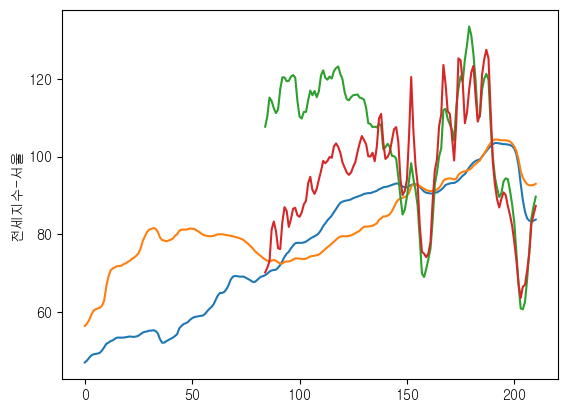

In [88]:
sns.lineplot(data=ind_t['전세지수-서울'])
sns.lineplot(data=indad_t['매매지수-서울'])
sns.lineplot(data=ind_t['전세수급-서울'])
sns.lineplot(data=ind_t['매매수급-서울'])

<Axes: ylabel='전세지수-서울'>

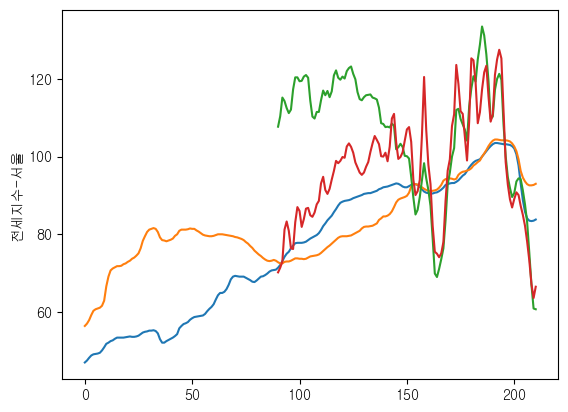

In [89]:
sns.lineplot(data=ind_t['전세지수-서울'])
sns.lineplot(data=ind_t['매매지수-서울'])
sns.lineplot(data=ind_t['전세수급-서울-6개월 전'])
sns.lineplot(data=ind_t['매매수급-서울-6개월 전'])

<Axes: ylabel='전세지수-서울'>

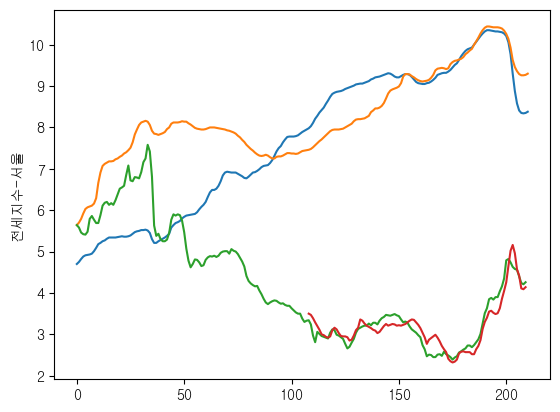

In [90]:
sns.lineplot(data=ind_t['전세지수-서울']/10)
sns.lineplot(data=ind_t['매매지수-서울']/10)
sns.lineplot(data=ind_t['주택담보대출 (연리%)'])
sns.lineplot(data=ind_t['전세자금대출 (연리%)'])

<Axes: ylabel='전세지수-서울'>

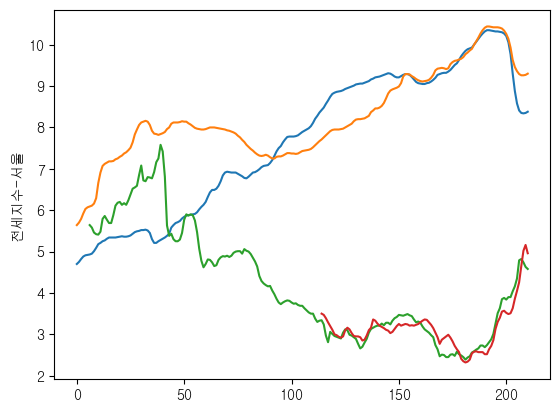

In [91]:
sns.lineplot(data=ind_t['전세지수-서울']/10)
sns.lineplot(data=ind_t['매매지수-서울']/10)
sns.lineplot(data=ind_t['주택담보대출 (연리%)-6개월 전'])
sns.lineplot(data=ind_t['전세자금대출 (연리%)-6개월 전'])

# XGB 

# 기준 1
### '구'로 구분

<Axes: xlabel='구', ylabel='mean'>

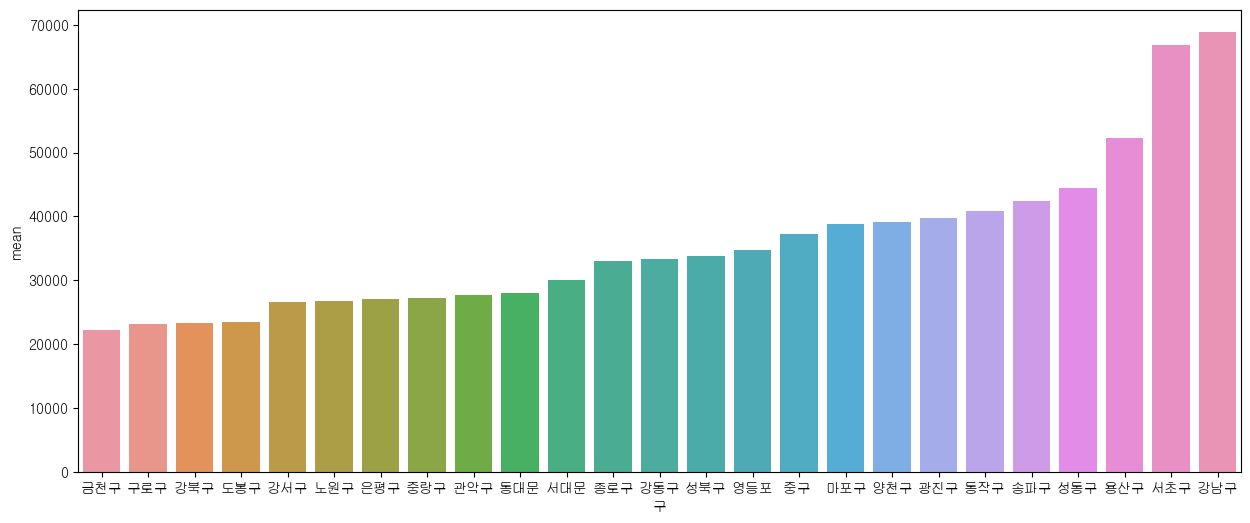

In [22]:
# 구 카테고리 인코딩 순서 정하기
plt.figure(figsize=(15, 6))
sns.barplot(x='구', y='mean', data=df_t.groupby('구')['월별평균 전세가'].agg(['mean']).sort_values('mean', ascending=True).reset_index())


In [23]:
# 딕셔너리 만드는 함수
def makedict(series):
    keys=[]
    values=[]

    for i, j in enumerate(series):
        keys.append(j)
        values.append(i)

    d = dict(zip(keys, values))
    return d

In [24]:
df_t_enc = df_t.copy()

In [25]:
df_t_enc

,주소,건물명,건축년도,면적,계약월,건물용도,월별평균 전세가,구,월별평균 매매가,CPI,...,매매수급-서울,전세지수-서울,매매지수-서울,전년도동월 대비 CPI 등락률,주택담보대출 (연리%),전세자금대출 (연리%),전세수급-서울-6개월 전,매매수급-서울-6개월 전,주택담보대출 (연리%)-6개월 전,전세자금대출 (연리%)-6개월 전
0,강남구 개포동 1164-12,새롬(1164-12),2000.0,74,2016-01,아파트,39613.0,강남구,43176.0,95.232,...,98.5,88.4,79.5,0.6,3.10,3.16,120.6,99.9,2.96,3.00
1,강남구 개포동 1164-12,새롬(1164-12),2000.0,74,2016-02,아파트,39661.0,강남구,43074.0,95.640,...,97.2,88.6,79.5,1.1,2.99,3.12,120.1,99.7,2.94,2.98
2,강남구 개포동 1164-12,새롬(1164-12),2000.0,74,2016-03,아파트,32368.0,강남구,43055.0,95.393,...,95.9,88.7,79.5,0.8,2.97,3.03,122.0,102.6,2.92,2.94
3,강남구 개포동 1164-12,새롬(1164-12),2000.0,74,2016-04,아파트,30753.0,강남구,43199.0,95.573,...,95.3,88.8,79.6,1.0,2.93,2.96,122.8,103.4,2.90,2.92
4,강남구 개포동 1164-12,새롬(1164-12),2000.0,74,2016-05,아파트,30790.0,강남구,43507.0,95.630,...,95.9,89.0,79.7,0.8,2.89,2.95,123.2,102.5,3.04,2.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202611,중랑구 중화동 454-0,동양엔파트2차,2013.0,96,2023-03,아파트,45000.0,중랑구,64019.0,110.560,...,70.7,84.1,92.9,4.2,4.40,4.42,83.1,78.1,4.79,4.26
2202612,중랑구 중화동 454-0,동양엔파트2차,2013.0,96,2023-04,아파트,44677.0,중랑구,63699.0,110.800,...,75.1,83.5,92.6,3.7,4.24,4.11,75.3,73.3,4.82,4.65
2202613,중랑구 중화동 454-0,동양엔파트2차,2013.0,96,2023-05,아파트,44480.0,중랑구,63515.0,111.130,...,82.7,83.4,92.6,3.3,4.21,4.09,67.1,67.2,4.74,5.02
2202614,중랑구 중화동 454-0,동양엔파트2차,2013.0,96,2023-06,아파트,44426.0,중랑구,63480.0,111.120,...,85.1,83.5,92.7,2.7,4.26,4.14,60.9,63.6,4.63,5.16


In [26]:
makedict(df_t.groupby('구')['월별평균 전세가'].agg(['mean']).sort_values('mean', ascending=True).reset_index()['구'])

{'금천구': 0,
 '구로구': 1,
 '강북구': 2,
 '도봉구': 3,
 '강서구': 4,
 '노원구': 5,
 '은평구': 6,
 '중랑구': 7,
 '관악구': 8,
 '동대문': 9,
 '서대문': 10,
 '종로구': 11,
 '강동구': 12,
 '성북구': 13,
 '영등포': 14,
 '중구 ': 15,
 '마포구': 16,
 '양천구': 17,
 '광진구': 18,
 '동작구': 19,
 '송파구': 20,
 '성동구': 21,
 '용산구': 22,
 '서초구': 23,
 '강남구': 24}

In [27]:
# 수동 인코딩 진행 (구, 계약월)-1

df_t_enc['구'] = df_t_enc['구'].map(makedict(df_t.groupby('구')['월별평균 전세가'].agg(['mean']).sort_values('mean', ascending=True).reset_index()['구']))
df_t_enc['계약월'] = df_t_enc['계약월'].map(makedict(df_t['계약월'].sort_values(ascending=True).drop_duplicates().reset_index(drop=True)))
df_t_enc['건축년도'] = df_t_enc['건축년도'].map(makedict(df_t['건축년도'].sort_values(ascending=True).drop_duplicates().reset_index(drop=True)))

In [28]:
df_t_enc = df_t_enc.sort_values(['구', '주소', '건물명', '건축년도', '면적',  '계약월'], ascending=True).reset_index(drop=True)

In [29]:
# 결측치 앞에 거로 채움
df_t_enc.fillna(method='ffill', inplace=True)

In [30]:
makedict(df_t['계약월'].sort_values(ascending=True).drop_duplicates().reset_index(drop=True))

{'2016-01': 0,
 '2016-02': 1,
 '2016-03': 2,
 '2016-04': 3,
 '2016-05': 4,
 '2016-06': 5,
 '2016-07': 6,
 '2016-08': 7,
 '2016-09': 8,
 '2016-10': 9,
 '2016-11': 10,
 '2016-12': 11,
 '2017-01': 12,
 '2017-02': 13,
 '2017-03': 14,
 '2017-04': 15,
 '2017-05': 16,
 '2017-06': 17,
 '2017-07': 18,
 '2017-08': 19,
 '2017-09': 20,
 '2017-10': 21,
 '2017-11': 22,
 '2017-12': 23,
 '2018-01': 24,
 '2018-02': 25,
 '2018-03': 26,
 '2018-04': 27,
 '2018-05': 28,
 '2018-06': 29,
 '2018-07': 30,
 '2018-08': 31,
 '2018-09': 32,
 '2018-10': 33,
 '2018-11': 34,
 '2018-12': 35,
 '2019-01': 36,
 '2019-02': 37,
 '2019-03': 38,
 '2019-04': 39,
 '2019-05': 40,
 '2019-06': 41,
 '2019-07': 42,
 '2019-08': 43,
 '2019-09': 44,
 '2019-10': 45,
 '2019-11': 46,
 '2019-12': 47,
 '2020-01': 48,
 '2020-02': 49,
 '2020-03': 50,
 '2020-04': 51,
 '2020-05': 52,
 '2020-06': 53,
 '2020-07': 54,
 '2020-08': 55,
 '2020-09': 56,
 '2020-10': 57,
 '2020-11': 58,
 '2020-12': 59,
 '2021-01': 60,
 '2021-02': 61,
 '2021-03': 62,
 '

In [31]:
# 훈련, 테스트 데이터 분리 
# 2023-03
train = df_t_enc.loc[df_t_enc['계약월'] < 86]
test = df_t_enc.loc[df_t_enc['계약월'] >= 86]

In [ ]:
# 수동 인코딩 진행 (구, 계약월)-2

# train['구'] = train['구'].map(makedict(train.groupby('구')['월별평균 전세가'].agg(['mean']).sort_values('mean', ascending=True).reset_index()['구']))
# train['계약월'] = train['계약월'].map(makedict(train['계약월'].sort_values(ascending=True).drop_duplicates().reset_index(drop=True)))

# test['구'] = test['구'].map(makedict(test.groupby('구')['월별평균 전세가'].agg(['mean']).sort_values('mean', ascending=True).reset_index()['구']))
# test['계약월'] = test['계약월'].map(makedict(test['계약월'].sort_values(ascending=True).drop_duplicates().reset_index(drop=True)))

In [ ]:
# train_enc = train.sort_values(['구', '주소', '건물명', '건축년도', '면적',  '계약월'], ascending=True).reset_index(drop=True)
# test_enc = test.sort_values(['구', '주소', '건물명', '건축년도', '면적',  '계약월'], ascending=True).reset_index(drop=True)

In [32]:
# 표준화
 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from category_encoders import OneHotEncoder,OrdinalEncoder


y_1_train=train['월별평균 전세가']
y_2_train=train['월별평균 매매가']

y_1_test=test['월별평균 전세가']
y_2_test=test['월별평균 매매가']

X_train=train.drop(['월별평균 전세가', '월별평균 매매가', '전세수급-서울', '월세수급-서울', '매매수급-서울', '전세지수-서울', '매매지수-서울','주택담보대출 (연리%)', '전세자금대출 (연리%)'], axis=1)
X_test=test.drop(['월별평균 전세가', '월별평균 매매가', '전세수급-서울', '월세수급-서울', '매매수급-서울', '전세지수-서울', '매매지수-서울','주택담보대출 (연리%)', '전세자금대출 (연리%)'], axis=1)

In [33]:
# 문자열 컬럼들

train_str = X_train[['주소', '건물명', '건물용도', '구', '건축년도', '계약월']]
test_str = X_test[['주소', '건물명', '건물용도', '구', '건축년도', '계약월']]

# 숫자 컬럼들

train_num = X_train.drop(['주소', '건물명', '구', '계약월','건축년도', '건물용도'], axis=1)
test_num = X_test.drop(['주소', '건물명', '구', '계약월', '건축년도',  '건물용도'], axis=1)

# minmax스케일링

scale = MinMaxScaler()

X_train_scaled = scale.fit_transform(train_num)
X_test_scaled = scale.transform(test_num)


# 오디널 인코딩

encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(train_str)
X_test_encoded = encoder.transform(test_str)

train_num.loc[:] = X_train_scaled
test_num.loc[:] = X_test_scaled

# 병합
X_train = pd.concat([train_num, X_train_encoded], axis=1)
X_test = pd.concat([test_num, X_test_encoded], axis=1)

In [34]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report

In [39]:
# 전세값 예측 모델
model_1 = XGBRegressor(
    #eval_metric="error",  # error = 1 - accuracy 지표를 사용해 평가합니다.
    n_estimators= 2000,  # 매우 큰 값으로 설정했지만, 성능 향상이 없으면 자동으로 종료합니다.
    random_state=1,
    n_jobs=-1,
    max_depth=8,# 아니면 4부터 8까지
    learning_rate=0.01, # 경사하강법의 학습률
    reg_lambda=1,
    subsample=0.6,
    min_child_weight = 5# 
    
)

watchlist = [(X_train, y_1_train), (X_test, y_1_test)]
# 조기종료 - 파이프라인 없이 해야함. early_stopping_rounds때문에.
model_1.fit(
    X_train,
    y_1_train,
    eval_set=watchlist,
    early_stopping_rounds=70,  # 50 rounds 동안 성능 개선이 없으면(=오차가 줄어들지 않으면) 학습을 중지합니다.
)


# 과적합정도와 성능 테스트

print("훈련 정확도", model_1.score(X_train, y_1_train))
print("검증 정확도", model_1.score(X_test, y_1_test))




# 검증 정확도가 오르면서 차이가 줄어야함
print("차이", model_1.score(X_train, y_1_train) - model_1.score(X_test, y_1_test))

C:\Users\Jae\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:48992.46065	validation_1-rmse:50256.28942
[1]	validation_0-rmse:48542.63553	validation_1-rmse:49760.56962
[2]	validation_0-rmse:48097.92269	validation_1-rmse:49267.15298
[3]	validation_0-rmse:47657.72378	validation_1-rmse:48782.68086
[4]	validation_0-rmse:47222.18306	validation_1-rmse:48299.60647
[5]	validation_0-rmse:46791.33493	validation_1-rmse:47821.85071
[6]	validation_0-rmse:46365.33702	validation_1-rmse:47352.90680
[7]	validation_0-rmse:45944.03385	validation_1-rmse:46885.34577
[8]	validation_0-rmse:45526.89129	validation_1-rmse:46427.71999
[9]	validation_0-rmse:45113.75773	validation_1-rmse:45971.43621
[10]	validation_0-rmse:44706.46208	validation_1-rmse:45520.38680
[11]	validation_0-rmse:44302.07249	validation_1-rmse:45074.91819
[12]	validation_0-rmse:43902.87420	validation_1-rmse:44635.64589
[13]	validation_0-rmse:43508.27680	validation_1-rmse:44199.91662
[14]	validation_0-rmse:43117.69732	validation_1-rmse:43772.77575
[15]	validation_0-rmse:42731.78304	

[126]	validation_0-rmse:18360.14910	validation_1-rmse:17280.23546
[127]	validation_0-rmse:18256.64245	validation_1-rmse:17181.87231
[128]	validation_0-rmse:18153.91010	validation_1-rmse:17087.89092
[129]	validation_0-rmse:18052.04331	validation_1-rmse:16992.56745
[130]	validation_0-rmse:17950.81906	validation_1-rmse:16902.10037
[131]	validation_0-rmse:17851.29784	validation_1-rmse:16809.27348
[132]	validation_0-rmse:17753.59655	validation_1-rmse:16717.01018
[133]	validation_0-rmse:17656.64229	validation_1-rmse:16630.03801
[134]	validation_0-rmse:17560.71921	validation_1-rmse:16546.04279
[135]	validation_0-rmse:17465.38661	validation_1-rmse:16458.47771
[136]	validation_0-rmse:17374.15994	validation_1-rmse:16376.15258
[137]	validation_0-rmse:17281.99057	validation_1-rmse:16292.44882
[138]	validation_0-rmse:17191.80139	validation_1-rmse:16213.26026
[139]	validation_0-rmse:17100.13072	validation_1-rmse:16133.73421
[140]	validation_0-rmse:17011.81363	validation_1-rmse:16057.57087
[141]	vali

[251]	validation_0-rmse:11933.91926	validation_1-rmse:12797.50178
[252]	validation_0-rmse:11913.89529	validation_1-rmse:12790.92380
[253]	validation_0-rmse:11894.83217	validation_1-rmse:12786.04828
[254]	validation_0-rmse:11874.58794	validation_1-rmse:12777.78155
[255]	validation_0-rmse:11855.88408	validation_1-rmse:12771.33086
[256]	validation_0-rmse:11838.07391	validation_1-rmse:12768.19264
[257]	validation_0-rmse:11820.62841	validation_1-rmse:12762.78373
[258]	validation_0-rmse:11802.29855	validation_1-rmse:12756.34783
[259]	validation_0-rmse:11785.55092	validation_1-rmse:12752.22049
[260]	validation_0-rmse:11767.21002	validation_1-rmse:12746.00345
[261]	validation_0-rmse:11750.13257	validation_1-rmse:12740.30193
[262]	validation_0-rmse:11734.39011	validation_1-rmse:12736.44326
[263]	validation_0-rmse:11715.53938	validation_1-rmse:12728.07985
[264]	validation_0-rmse:11698.38947	validation_1-rmse:12721.80488
[265]	validation_0-rmse:11680.26982	validation_1-rmse:12715.14374
[266]	vali

[376]	validation_0-rmse:10587.96775	validation_1-rmse:12287.82127
[377]	validation_0-rmse:10581.83067	validation_1-rmse:12283.17339
[378]	validation_0-rmse:10575.21342	validation_1-rmse:12280.07265
[379]	validation_0-rmse:10570.16997	validation_1-rmse:12276.89123
[380]	validation_0-rmse:10564.29509	validation_1-rmse:12274.01177
[381]	validation_0-rmse:10559.75055	validation_1-rmse:12269.96199
[382]	validation_0-rmse:10553.73663	validation_1-rmse:12265.80146
[383]	validation_0-rmse:10547.29180	validation_1-rmse:12260.93708
[384]	validation_0-rmse:10542.28637	validation_1-rmse:12258.87058
[385]	validation_0-rmse:10536.98921	validation_1-rmse:12256.26796
[386]	validation_0-rmse:10529.86471	validation_1-rmse:12251.43585
[387]	validation_0-rmse:10525.62949	validation_1-rmse:12247.25066
[388]	validation_0-rmse:10519.73658	validation_1-rmse:12243.98224
[389]	validation_0-rmse:10511.74257	validation_1-rmse:12238.41196
[390]	validation_0-rmse:10505.30845	validation_1-rmse:12235.17242
[391]	vali

[501]	validation_0-rmse:9968.71115	validation_1-rmse:11774.88817
[502]	validation_0-rmse:9964.76594	validation_1-rmse:11771.27469
[503]	validation_0-rmse:9962.56559	validation_1-rmse:11767.83242
[504]	validation_0-rmse:9957.83412	validation_1-rmse:11764.22939
[505]	validation_0-rmse:9955.88773	validation_1-rmse:11761.63759
[506]	validation_0-rmse:9951.48764	validation_1-rmse:11757.57855
[507]	validation_0-rmse:9946.43648	validation_1-rmse:11753.31387
[508]	validation_0-rmse:9941.90162	validation_1-rmse:11749.84901
[509]	validation_0-rmse:9939.36184	validation_1-rmse:11746.57895
[510]	validation_0-rmse:9936.96275	validation_1-rmse:11743.38436
[511]	validation_0-rmse:9931.59755	validation_1-rmse:11738.89625
[512]	validation_0-rmse:9928.44629	validation_1-rmse:11735.44698
[513]	validation_0-rmse:9925.80253	validation_1-rmse:11733.09152
[514]	validation_0-rmse:9923.67148	validation_1-rmse:11730.02561
[515]	validation_0-rmse:9922.02660	validation_1-rmse:11727.52891
[516]	validation_0-rmse:9

[628]	validation_0-rmse:9581.57940	validation_1-rmse:11387.82657
[629]	validation_0-rmse:9579.35550	validation_1-rmse:11384.91972
[630]	validation_0-rmse:9575.98438	validation_1-rmse:11381.42518
[631]	validation_0-rmse:9574.81411	validation_1-rmse:11377.10668
[632]	validation_0-rmse:9570.72161	validation_1-rmse:11373.14420
[633]	validation_0-rmse:9568.26168	validation_1-rmse:11371.43338
[634]	validation_0-rmse:9566.51114	validation_1-rmse:11368.66510
[635]	validation_0-rmse:9564.03808	validation_1-rmse:11366.46668
[636]	validation_0-rmse:9561.25619	validation_1-rmse:11363.90020
[637]	validation_0-rmse:9559.69814	validation_1-rmse:11362.79422
[638]	validation_0-rmse:9557.74918	validation_1-rmse:11361.35098
[639]	validation_0-rmse:9554.03618	validation_1-rmse:11357.48456
[640]	validation_0-rmse:9551.44206	validation_1-rmse:11354.95869
[641]	validation_0-rmse:9547.73792	validation_1-rmse:11351.19266
[642]	validation_0-rmse:9545.21977	validation_1-rmse:11347.99196
[643]	validation_0-rmse:9

[755]	validation_0-rmse:9301.56739	validation_1-rmse:11039.90493
[756]	validation_0-rmse:9298.96410	validation_1-rmse:11037.49673
[757]	validation_0-rmse:9298.03985	validation_1-rmse:11036.40299
[758]	validation_0-rmse:9294.52523	validation_1-rmse:11032.49186
[759]	validation_0-rmse:9292.29481	validation_1-rmse:11030.39825
[760]	validation_0-rmse:9290.17308	validation_1-rmse:11028.25161
[761]	validation_0-rmse:9288.62085	validation_1-rmse:11024.38658
[762]	validation_0-rmse:9286.89328	validation_1-rmse:11020.69960
[763]	validation_0-rmse:9283.22874	validation_1-rmse:11017.14022
[764]	validation_0-rmse:9281.15209	validation_1-rmse:11013.70696
[765]	validation_0-rmse:9278.70375	validation_1-rmse:11011.36771
[766]	validation_0-rmse:9276.26212	validation_1-rmse:11009.39824
[767]	validation_0-rmse:9272.53254	validation_1-rmse:11005.32078
[768]	validation_0-rmse:9270.81629	validation_1-rmse:11001.91238
[769]	validation_0-rmse:9269.22313	validation_1-rmse:11000.75435
[770]	validation_0-rmse:9

[882]	validation_0-rmse:9048.51340	validation_1-rmse:10740.87606
[883]	validation_0-rmse:9047.12961	validation_1-rmse:10737.12786
[884]	validation_0-rmse:9045.34243	validation_1-rmse:10735.51718
[885]	validation_0-rmse:9044.89607	validation_1-rmse:10734.81210
[886]	validation_0-rmse:9042.70080	validation_1-rmse:10732.81244
[887]	validation_0-rmse:9040.59647	validation_1-rmse:10731.10478
[888]	validation_0-rmse:9039.05547	validation_1-rmse:10729.33700
[889]	validation_0-rmse:9035.94433	validation_1-rmse:10726.09403
[890]	validation_0-rmse:9033.87188	validation_1-rmse:10723.90763
[891]	validation_0-rmse:9033.00563	validation_1-rmse:10722.92267
[892]	validation_0-rmse:9029.67253	validation_1-rmse:10719.46218
[893]	validation_0-rmse:9028.10847	validation_1-rmse:10717.35784
[894]	validation_0-rmse:9026.01777	validation_1-rmse:10715.05467
[895]	validation_0-rmse:9025.07343	validation_1-rmse:10714.13713
[896]	validation_0-rmse:9024.09710	validation_1-rmse:10710.77523
[897]	validation_0-rmse:9

[1008]	validation_0-rmse:8825.65920	validation_1-rmse:10471.45128
[1009]	validation_0-rmse:8824.73254	validation_1-rmse:10468.63089
[1010]	validation_0-rmse:8821.80527	validation_1-rmse:10465.92947
[1011]	validation_0-rmse:8819.37567	validation_1-rmse:10463.03968
[1012]	validation_0-rmse:8817.97150	validation_1-rmse:10461.68273
[1013]	validation_0-rmse:8816.20208	validation_1-rmse:10460.23557
[1014]	validation_0-rmse:8813.61826	validation_1-rmse:10457.70024
[1015]	validation_0-rmse:8813.07616	validation_1-rmse:10457.26302
[1016]	validation_0-rmse:8811.25802	validation_1-rmse:10455.52862
[1017]	validation_0-rmse:8808.54616	validation_1-rmse:10452.58347
[1018]	validation_0-rmse:8806.06288	validation_1-rmse:10449.68589
[1019]	validation_0-rmse:8803.29385	validation_1-rmse:10446.95023
[1020]	validation_0-rmse:8802.72150	validation_1-rmse:10446.33918
[1021]	validation_0-rmse:8800.36401	validation_1-rmse:10443.95792
[1022]	validation_0-rmse:8799.71703	validation_1-rmse:10442.22363
[1023]	val

[1133]	validation_0-rmse:8612.60163	validation_1-rmse:10226.45926
[1134]	validation_0-rmse:8610.95137	validation_1-rmse:10225.01427
[1135]	validation_0-rmse:8610.03634	validation_1-rmse:10222.67487
[1136]	validation_0-rmse:8609.00670	validation_1-rmse:10221.80212
[1137]	validation_0-rmse:8607.71802	validation_1-rmse:10218.27572
[1138]	validation_0-rmse:8604.83572	validation_1-rmse:10214.60376
[1139]	validation_0-rmse:8602.76838	validation_1-rmse:10212.44454
[1140]	validation_0-rmse:8601.12579	validation_1-rmse:10210.80860
[1141]	validation_0-rmse:8598.05815	validation_1-rmse:10207.91103
[1142]	validation_0-rmse:8597.35808	validation_1-rmse:10207.27954
[1143]	validation_0-rmse:8595.95855	validation_1-rmse:10204.03489
[1144]	validation_0-rmse:8594.20601	validation_1-rmse:10200.31412
[1145]	validation_0-rmse:8591.61231	validation_1-rmse:10197.71506
[1146]	validation_0-rmse:8589.47731	validation_1-rmse:10195.82785
[1147]	validation_0-rmse:8588.86984	validation_1-rmse:10193.23463
[1148]	val

[1258]	validation_0-rmse:8427.66726	validation_1-rmse:10013.42655
[1259]	validation_0-rmse:8426.36616	validation_1-rmse:10012.36004
[1260]	validation_0-rmse:8424.15916	validation_1-rmse:10009.81913
[1261]	validation_0-rmse:8422.20909	validation_1-rmse:10007.98029
[1262]	validation_0-rmse:8421.02070	validation_1-rmse:10006.63903
[1263]	validation_0-rmse:8418.99364	validation_1-rmse:10004.94805
[1264]	validation_0-rmse:8417.43470	validation_1-rmse:10003.62620
[1265]	validation_0-rmse:8414.70288	validation_1-rmse:10000.33961
[1266]	validation_0-rmse:8413.19187	validation_1-rmse:9999.07062
[1267]	validation_0-rmse:8412.29122	validation_1-rmse:9998.27732
[1268]	validation_0-rmse:8410.83622	validation_1-rmse:9996.77599
[1269]	validation_0-rmse:8409.45038	validation_1-rmse:9995.57602
[1270]	validation_0-rmse:8409.13928	validation_1-rmse:9995.29825
[1271]	validation_0-rmse:8407.09072	validation_1-rmse:9993.10917
[1272]	validation_0-rmse:8404.81727	validation_1-rmse:9990.67202
[1273]	validation

[1384]	validation_0-rmse:8259.48680	validation_1-rmse:9829.12615
[1385]	validation_0-rmse:8258.47946	validation_1-rmse:9828.24887
[1386]	validation_0-rmse:8258.14860	validation_1-rmse:9828.05865
[1387]	validation_0-rmse:8256.70049	validation_1-rmse:9826.54136
[1388]	validation_0-rmse:8254.06822	validation_1-rmse:9824.00995
[1389]	validation_0-rmse:8252.68248	validation_1-rmse:9822.80962
[1390]	validation_0-rmse:8250.89881	validation_1-rmse:9820.72189
[1391]	validation_0-rmse:8250.06841	validation_1-rmse:9818.93090
[1392]	validation_0-rmse:8249.21772	validation_1-rmse:9818.17478
[1393]	validation_0-rmse:8248.20875	validation_1-rmse:9817.05921
[1394]	validation_0-rmse:8247.88020	validation_1-rmse:9816.68736
[1395]	validation_0-rmse:8247.48492	validation_1-rmse:9816.25775
[1396]	validation_0-rmse:8246.85081	validation_1-rmse:9815.49159
[1397]	validation_0-rmse:8245.74555	validation_1-rmse:9814.53595
[1398]	validation_0-rmse:8243.30818	validation_1-rmse:9812.37309
[1399]	validation_0-rmse:

[1511]	validation_0-rmse:8100.95678	validation_1-rmse:9653.92034
[1512]	validation_0-rmse:8099.58243	validation_1-rmse:9652.82082
[1513]	validation_0-rmse:8098.42767	validation_1-rmse:9651.43288
[1514]	validation_0-rmse:8096.28957	validation_1-rmse:9649.20980
[1515]	validation_0-rmse:8096.10181	validation_1-rmse:9646.97986
[1516]	validation_0-rmse:8094.26303	validation_1-rmse:9645.11925
[1517]	validation_0-rmse:8093.30839	validation_1-rmse:9644.31617
[1518]	validation_0-rmse:8091.48304	validation_1-rmse:9642.64818
[1519]	validation_0-rmse:8090.57520	validation_1-rmse:9641.91324
[1520]	validation_0-rmse:8090.23646	validation_1-rmse:9640.57865
[1521]	validation_0-rmse:8088.77399	validation_1-rmse:9639.24986
[1522]	validation_0-rmse:8087.21259	validation_1-rmse:9638.21491
[1523]	validation_0-rmse:8085.74820	validation_1-rmse:9636.96976
[1524]	validation_0-rmse:8084.92615	validation_1-rmse:9636.13019
[1525]	validation_0-rmse:8083.38141	validation_1-rmse:9634.76247
[1526]	validation_0-rmse:

[1638]	validation_0-rmse:7948.95398	validation_1-rmse:9487.24188
[1639]	validation_0-rmse:7947.78426	validation_1-rmse:9486.17627
[1640]	validation_0-rmse:7945.84784	validation_1-rmse:9484.11923
[1641]	validation_0-rmse:7945.36032	validation_1-rmse:9483.61565
[1642]	validation_0-rmse:7944.75189	validation_1-rmse:9481.23587
[1643]	validation_0-rmse:7943.90766	validation_1-rmse:9480.55557
[1644]	validation_0-rmse:7942.74226	validation_1-rmse:9479.19979
[1645]	validation_0-rmse:7942.53913	validation_1-rmse:9477.65868
[1646]	validation_0-rmse:7942.26790	validation_1-rmse:9477.37854
[1647]	validation_0-rmse:7941.94798	validation_1-rmse:9476.88893
[1648]	validation_0-rmse:7941.04622	validation_1-rmse:9475.93018
[1649]	validation_0-rmse:7940.91312	validation_1-rmse:9475.70141
[1650]	validation_0-rmse:7940.00152	validation_1-rmse:9474.84722
[1651]	validation_0-rmse:7939.29703	validation_1-rmse:9474.22413
[1652]	validation_0-rmse:7938.77788	validation_1-rmse:9473.64505
[1653]	validation_0-rmse:

[1765]	validation_0-rmse:7809.32378	validation_1-rmse:9335.72916
[1766]	validation_0-rmse:7808.40282	validation_1-rmse:9333.08553
[1767]	validation_0-rmse:7807.04592	validation_1-rmse:9331.76688
[1768]	validation_0-rmse:7805.39636	validation_1-rmse:9330.30940
[1769]	validation_0-rmse:7804.53352	validation_1-rmse:9329.53848
[1770]	validation_0-rmse:7802.67337	validation_1-rmse:9327.47340
[1771]	validation_0-rmse:7802.19699	validation_1-rmse:9325.96335
[1772]	validation_0-rmse:7801.30542	validation_1-rmse:9324.52358
[1773]	validation_0-rmse:7800.64895	validation_1-rmse:9323.89276
[1774]	validation_0-rmse:7800.41529	validation_1-rmse:9323.72423
[1775]	validation_0-rmse:7799.74611	validation_1-rmse:9323.09206
[1776]	validation_0-rmse:7799.00989	validation_1-rmse:9322.43480
[1777]	validation_0-rmse:7797.56956	validation_1-rmse:9320.79477
[1778]	validation_0-rmse:7796.15480	validation_1-rmse:9319.45610
[1779]	validation_0-rmse:7794.50432	validation_1-rmse:9317.82951
[1780]	validation_0-rmse:

[1892]	validation_0-rmse:7675.57820	validation_1-rmse:9196.99840
[1893]	validation_0-rmse:7673.59177	validation_1-rmse:9195.12679
[1894]	validation_0-rmse:7672.77145	validation_1-rmse:9194.32414
[1895]	validation_0-rmse:7671.89928	validation_1-rmse:9193.60172
[1896]	validation_0-rmse:7671.45352	validation_1-rmse:9193.23214
[1897]	validation_0-rmse:7670.99163	validation_1-rmse:9192.89045
[1898]	validation_0-rmse:7670.73712	validation_1-rmse:9192.28857
[1899]	validation_0-rmse:7669.47917	validation_1-rmse:9191.11012
[1900]	validation_0-rmse:7668.67445	validation_1-rmse:9190.23266
[1901]	validation_0-rmse:7668.36976	validation_1-rmse:9189.84300
[1902]	validation_0-rmse:7667.45867	validation_1-rmse:9188.86177
[1903]	validation_0-rmse:7666.82206	validation_1-rmse:9188.25871
[1904]	validation_0-rmse:7665.48440	validation_1-rmse:9187.04972
[1905]	validation_0-rmse:7664.76542	validation_1-rmse:9186.34348
[1906]	validation_0-rmse:7663.08886	validation_1-rmse:9184.72092
[1907]	validation_0-rmse:

In [40]:
# 매매가 예측 모델
model_2 = XGBRegressor(
    #eval_metric="error",  # error = 1 - accuracy 지표를 사용해 평가합니다.
    n_estimators= 2000,  # 매우 큰 값으로 설정했지만, 성능 향상이 없으면 자동으로 종료합니다.
    random_state=1,
    n_jobs=-1,
    max_depth=8,# 아니면 4부터 8까지
    learning_rate=0.01, # 경사하강법의 학습률
    reg_lambda=1,
    subsample=0.6,
    min_child_weight = 5# 
    
)

watchlist = [(X_train, y_2_train), (X_test, y_2_test)]
# 조기종료 - 파이프라인 없이 해야함. early_stopping_rounds때문에.
model_2.fit(
    X_train,
    y_2_train,
    eval_set=watchlist,
    early_stopping_rounds=70,  # 50 rounds 동안 성능 개선이 없으면(=오차가 줄어들지 않으면) 학습을 중지합니다.
)


# 과적합정도와 성능 테스트

print("훈련 정확도", model_2.score(X_train, y_2_train))
print("검증 정확도", model_2.score(X_test, y_2_test))


# 검증 정확도가 오르면서 차이가 줄어야함
print("차이", model_2.score(X_train, y_2_train) - model_2.score(X_test, y_2_test))

C:\Users\Jae\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:82314.07134	validation_1-rmse:95423.20756
[1]	validation_0-rmse:81572.24368	validation_1-rmse:94575.65228
[2]	validation_0-rmse:80838.50265	validation_1-rmse:93740.35965
[3]	validation_0-rmse:80112.87306	validation_1-rmse:92906.07375
[4]	validation_0-rmse:79394.74048	validation_1-rmse:92078.88393
[5]	validation_0-rmse:78684.98634	validation_1-rmse:91272.06917
[6]	validation_0-rmse:77982.85899	validation_1-rmse:90463.05471
[7]	validation_0-rmse:77287.85997	validation_1-rmse:89662.68022
[8]	validation_0-rmse:76601.45600	validation_1-rmse:88879.24763
[9]	validation_0-rmse:75922.01191	validation_1-rmse:88102.67218
[10]	validation_0-rmse:75249.97782	validation_1-rmse:87330.84838
[11]	validation_0-rmse:74585.94571	validation_1-rmse:86566.92124
[12]	validation_0-rmse:73928.27424	validation_1-rmse:85810.46665
[13]	validation_0-rmse:73276.51116	validation_1-rmse:85055.73974
[14]	validation_0-rmse:72632.21745	validation_1-rmse:84310.61506
[15]	validation_0-rmse:71995.13292	

[126]	validation_0-rmse:31950.23294	validation_1-rmse:37026.24132
[127]	validation_0-rmse:31774.63960	validation_1-rmse:36822.03704
[128]	validation_0-rmse:31601.81803	validation_1-rmse:36619.02329
[129]	validation_0-rmse:31432.50536	validation_1-rmse:36430.91888
[130]	validation_0-rmse:31265.18545	validation_1-rmse:36240.40237
[131]	validation_0-rmse:31100.64100	validation_1-rmse:36048.93054
[132]	validation_0-rmse:30940.46742	validation_1-rmse:35863.47879
[133]	validation_0-rmse:30779.18169	validation_1-rmse:35682.59912
[134]	validation_0-rmse:30623.86673	validation_1-rmse:35506.91673
[135]	validation_0-rmse:30466.17712	validation_1-rmse:35325.14590
[136]	validation_0-rmse:30311.80374	validation_1-rmse:35144.53896
[137]	validation_0-rmse:30161.23291	validation_1-rmse:34978.58173
[138]	validation_0-rmse:30010.53415	validation_1-rmse:34799.15402
[139]	validation_0-rmse:29860.67407	validation_1-rmse:34623.53867
[140]	validation_0-rmse:29716.50849	validation_1-rmse:34464.43566
[141]	vali

[251]	validation_0-rmse:20994.75008	validation_1-rmse:25051.97755
[252]	validation_0-rmse:20958.91464	validation_1-rmse:25017.56034
[253]	validation_0-rmse:20921.37596	validation_1-rmse:24983.43225
[254]	validation_0-rmse:20888.00022	validation_1-rmse:24954.99900
[255]	validation_0-rmse:20847.50003	validation_1-rmse:24917.88561
[256]	validation_0-rmse:20807.19948	validation_1-rmse:24877.45770
[257]	validation_0-rmse:20769.67370	validation_1-rmse:24843.50698
[258]	validation_0-rmse:20734.66248	validation_1-rmse:24812.32334
[259]	validation_0-rmse:20699.46758	validation_1-rmse:24780.76100
[260]	validation_0-rmse:20662.01600	validation_1-rmse:24743.96684
[261]	validation_0-rmse:20631.40119	validation_1-rmse:24714.22910
[262]	validation_0-rmse:20598.14640	validation_1-rmse:24685.16672
[263]	validation_0-rmse:20562.07735	validation_1-rmse:24652.78315
[264]	validation_0-rmse:20530.37208	validation_1-rmse:24621.62472
[265]	validation_0-rmse:20493.93540	validation_1-rmse:24584.80478
[266]	vali

[376]	validation_0-rmse:18286.14437	validation_1-rmse:22518.86373
[377]	validation_0-rmse:18274.36513	validation_1-rmse:22508.18501
[378]	validation_0-rmse:18262.29290	validation_1-rmse:22497.58222
[379]	validation_0-rmse:18248.92001	validation_1-rmse:22485.50506
[380]	validation_0-rmse:18236.29385	validation_1-rmse:22472.84278
[381]	validation_0-rmse:18224.33869	validation_1-rmse:22463.33016
[382]	validation_0-rmse:18212.24682	validation_1-rmse:22452.55246
[383]	validation_0-rmse:18200.65478	validation_1-rmse:22442.33715
[384]	validation_0-rmse:18191.18486	validation_1-rmse:22433.40387
[385]	validation_0-rmse:18176.13776	validation_1-rmse:22416.47233
[386]	validation_0-rmse:18165.01877	validation_1-rmse:22403.35391
[387]	validation_0-rmse:18154.09434	validation_1-rmse:22393.97101
[388]	validation_0-rmse:18144.57907	validation_1-rmse:22387.06607
[389]	validation_0-rmse:18129.54299	validation_1-rmse:22374.20981
[390]	validation_0-rmse:18117.61392	validation_1-rmse:22363.60939
[391]	vali

[501]	validation_0-rmse:16997.93598	validation_1-rmse:21275.81205
[502]	validation_0-rmse:16987.48574	validation_1-rmse:21264.81680
[503]	validation_0-rmse:16977.17114	validation_1-rmse:21254.92916
[504]	validation_0-rmse:16967.07327	validation_1-rmse:21244.92491
[505]	validation_0-rmse:16961.45872	validation_1-rmse:21241.71669
[506]	validation_0-rmse:16953.06257	validation_1-rmse:21234.02173
[507]	validation_0-rmse:16948.30132	validation_1-rmse:21228.90284
[508]	validation_0-rmse:16942.25342	validation_1-rmse:21223.51708
[509]	validation_0-rmse:16936.33454	validation_1-rmse:21218.44634
[510]	validation_0-rmse:16931.12617	validation_1-rmse:21213.51756
[511]	validation_0-rmse:16924.99079	validation_1-rmse:21207.92681
[512]	validation_0-rmse:16919.42789	validation_1-rmse:21200.04752
[513]	validation_0-rmse:16909.57032	validation_1-rmse:21188.71860
[514]	validation_0-rmse:16905.07819	validation_1-rmse:21184.34120
[515]	validation_0-rmse:16899.73334	validation_1-rmse:21178.97392
[516]	vali

[626]	validation_0-rmse:16119.04030	validation_1-rmse:20344.86269
[627]	validation_0-rmse:16111.62006	validation_1-rmse:20336.37578
[628]	validation_0-rmse:16102.74580	validation_1-rmse:20327.55726
[629]	validation_0-rmse:16091.97358	validation_1-rmse:20315.58600
[630]	validation_0-rmse:16088.15804	validation_1-rmse:20311.87319
[631]	validation_0-rmse:16085.64954	validation_1-rmse:20308.81257
[632]	validation_0-rmse:16075.57850	validation_1-rmse:20297.36233
[633]	validation_0-rmse:16072.60095	validation_1-rmse:20293.12513
[634]	validation_0-rmse:16060.35311	validation_1-rmse:20280.29584
[635]	validation_0-rmse:16053.61533	validation_1-rmse:20273.66331
[636]	validation_0-rmse:16049.08578	validation_1-rmse:20268.16035
[637]	validation_0-rmse:16046.43956	validation_1-rmse:20265.46764
[638]	validation_0-rmse:16042.67769	validation_1-rmse:20259.93563
[639]	validation_0-rmse:16038.98504	validation_1-rmse:20255.25422
[640]	validation_0-rmse:16034.06213	validation_1-rmse:20250.34876
[641]	vali

[751]	validation_0-rmse:15456.76836	validation_1-rmse:19558.57293
[752]	validation_0-rmse:15452.56329	validation_1-rmse:19551.88713
[753]	validation_0-rmse:15448.77729	validation_1-rmse:19548.46490
[754]	validation_0-rmse:15441.80883	validation_1-rmse:19539.97520
[755]	validation_0-rmse:15437.97047	validation_1-rmse:19533.96246
[756]	validation_0-rmse:15432.74875	validation_1-rmse:19527.90560
[757]	validation_0-rmse:15428.66901	validation_1-rmse:19523.98656
[758]	validation_0-rmse:15425.30001	validation_1-rmse:19520.95772
[759]	validation_0-rmse:15420.33773	validation_1-rmse:19515.34935
[760]	validation_0-rmse:15415.33335	validation_1-rmse:19509.74695
[761]	validation_0-rmse:15411.27614	validation_1-rmse:19504.59938
[762]	validation_0-rmse:15402.16395	validation_1-rmse:19495.35522
[763]	validation_0-rmse:15399.76842	validation_1-rmse:19489.16719
[764]	validation_0-rmse:15397.10392	validation_1-rmse:19483.02924
[765]	validation_0-rmse:15387.16682	validation_1-rmse:19472.09487
[766]	vali

[876]	validation_0-rmse:14901.40976	validation_1-rmse:18869.64509
[877]	validation_0-rmse:14899.05971	validation_1-rmse:18866.83611
[878]	validation_0-rmse:14896.73199	validation_1-rmse:18863.82362
[879]	validation_0-rmse:14894.27805	validation_1-rmse:18861.26757
[880]	validation_0-rmse:14891.24054	validation_1-rmse:18857.30913
[881]	validation_0-rmse:14887.91380	validation_1-rmse:18852.04388
[882]	validation_0-rmse:14885.35820	validation_1-rmse:18846.09570
[883]	validation_0-rmse:14882.39652	validation_1-rmse:18839.84465
[884]	validation_0-rmse:14880.36392	validation_1-rmse:18834.02624
[885]	validation_0-rmse:14878.03095	validation_1-rmse:18831.38642
[886]	validation_0-rmse:14870.10055	validation_1-rmse:18822.53919
[887]	validation_0-rmse:14864.29190	validation_1-rmse:18816.63183
[888]	validation_0-rmse:14861.01624	validation_1-rmse:18812.76385
[889]	validation_0-rmse:14855.50123	validation_1-rmse:18806.30270
[890]	validation_0-rmse:14853.08030	validation_1-rmse:18803.37929
[891]	vali

[1001]	validation_0-rmse:14429.39945	validation_1-rmse:18304.95966
[1002]	validation_0-rmse:14424.10514	validation_1-rmse:18299.32800
[1003]	validation_0-rmse:14418.50577	validation_1-rmse:18293.77910
[1004]	validation_0-rmse:14414.43300	validation_1-rmse:18289.48833
[1005]	validation_0-rmse:14409.12522	validation_1-rmse:18283.68037
[1006]	validation_0-rmse:14407.47845	validation_1-rmse:18278.77988
[1007]	validation_0-rmse:14404.70596	validation_1-rmse:18276.04676
[1008]	validation_0-rmse:14401.69634	validation_1-rmse:18273.01754
[1009]	validation_0-rmse:14397.70895	validation_1-rmse:18268.85190
[1010]	validation_0-rmse:14391.25384	validation_1-rmse:18261.97732
[1011]	validation_0-rmse:14386.24794	validation_1-rmse:18256.38994
[1012]	validation_0-rmse:14384.11492	validation_1-rmse:18248.84144
[1013]	validation_0-rmse:14381.00534	validation_1-rmse:18245.05724
[1014]	validation_0-rmse:14375.69848	validation_1-rmse:18239.09454
[1015]	validation_0-rmse:14373.77092	validation_1-rmse:18237.0

[1124]	validation_0-rmse:14022.66683	validation_1-rmse:17794.85412
[1125]	validation_0-rmse:14018.56974	validation_1-rmse:17790.70401
[1126]	validation_0-rmse:14016.15253	validation_1-rmse:17787.45395
[1127]	validation_0-rmse:14012.00997	validation_1-rmse:17783.23539
[1128]	validation_0-rmse:14007.28219	validation_1-rmse:17778.16870
[1129]	validation_0-rmse:14002.98846	validation_1-rmse:17773.85144
[1130]	validation_0-rmse:14000.77701	validation_1-rmse:17771.59065
[1131]	validation_0-rmse:13995.25261	validation_1-rmse:17765.68659
[1132]	validation_0-rmse:13992.10238	validation_1-rmse:17761.38917
[1133]	validation_0-rmse:13988.05573	validation_1-rmse:17757.33962
[1134]	validation_0-rmse:13983.18116	validation_1-rmse:17752.18635
[1135]	validation_0-rmse:13978.23616	validation_1-rmse:17746.56278
[1136]	validation_0-rmse:13973.45727	validation_1-rmse:17741.73711
[1137]	validation_0-rmse:13972.15426	validation_1-rmse:17740.27771
[1138]	validation_0-rmse:13967.30915	validation_1-rmse:17735.1

[1247]	validation_0-rmse:13653.80140	validation_1-rmse:17346.26520
[1248]	validation_0-rmse:13652.81276	validation_1-rmse:17345.33236
[1249]	validation_0-rmse:13651.07189	validation_1-rmse:17340.97079
[1250]	validation_0-rmse:13647.58752	validation_1-rmse:17337.20226
[1251]	validation_0-rmse:13644.48225	validation_1-rmse:17333.99374
[1252]	validation_0-rmse:13642.94563	validation_1-rmse:17332.48164
[1253]	validation_0-rmse:13641.28472	validation_1-rmse:17329.34072
[1254]	validation_0-rmse:13640.57365	validation_1-rmse:17328.59622
[1255]	validation_0-rmse:13637.50908	validation_1-rmse:17324.63731
[1256]	validation_0-rmse:13635.24022	validation_1-rmse:17319.65674
[1257]	validation_0-rmse:13631.14035	validation_1-rmse:17315.15484
[1258]	validation_0-rmse:13630.29294	validation_1-rmse:17314.20574
[1259]	validation_0-rmse:13627.17205	validation_1-rmse:17310.85507
[1260]	validation_0-rmse:13625.55145	validation_1-rmse:17308.97714
[1261]	validation_0-rmse:13624.11854	validation_1-rmse:17307.4

[1370]	validation_0-rmse:13310.25960	validation_1-rmse:16924.49702
[1371]	validation_0-rmse:13306.61603	validation_1-rmse:16920.15158
[1372]	validation_0-rmse:13303.20350	validation_1-rmse:16916.12891
[1373]	validation_0-rmse:13299.31563	validation_1-rmse:16912.04902
[1374]	validation_0-rmse:13296.38149	validation_1-rmse:16909.01111
[1375]	validation_0-rmse:13293.09253	validation_1-rmse:16905.11826
[1376]	validation_0-rmse:13289.26153	validation_1-rmse:16900.69476
[1377]	validation_0-rmse:13287.93667	validation_1-rmse:16899.02929
[1378]	validation_0-rmse:13285.41761	validation_1-rmse:16896.02022
[1379]	validation_0-rmse:13279.93459	validation_1-rmse:16889.68146
[1380]	validation_0-rmse:13276.21758	validation_1-rmse:16885.38464
[1381]	validation_0-rmse:13271.33677	validation_1-rmse:16879.88909
[1382]	validation_0-rmse:13268.15784	validation_1-rmse:16876.30291
[1383]	validation_0-rmse:13264.63084	validation_1-rmse:16872.57258
[1384]	validation_0-rmse:13263.13073	validation_1-rmse:16870.7

[1493]	validation_0-rmse:12975.85424	validation_1-rmse:16520.56810
[1494]	validation_0-rmse:12975.02880	validation_1-rmse:16519.60261
[1495]	validation_0-rmse:12972.53628	validation_1-rmse:16516.90987
[1496]	validation_0-rmse:12969.80709	validation_1-rmse:16513.82113
[1497]	validation_0-rmse:12968.67667	validation_1-rmse:16509.66295
[1498]	validation_0-rmse:12965.96811	validation_1-rmse:16506.40937
[1499]	validation_0-rmse:12963.92658	validation_1-rmse:16504.17122
[1500]	validation_0-rmse:12960.24931	validation_1-rmse:16499.65766
[1501]	validation_0-rmse:12955.95336	validation_1-rmse:16495.04871
[1502]	validation_0-rmse:12955.01415	validation_1-rmse:16493.97833
[1503]	validation_0-rmse:12953.71820	validation_1-rmse:16492.83677
[1504]	validation_0-rmse:12952.88433	validation_1-rmse:16491.89655
[1505]	validation_0-rmse:12950.44137	validation_1-rmse:16489.20449
[1506]	validation_0-rmse:12948.76413	validation_1-rmse:16486.82067
[1507]	validation_0-rmse:12945.55078	validation_1-rmse:16482.9

[1616]	validation_0-rmse:12689.44071	validation_1-rmse:16154.23559
[1617]	validation_0-rmse:12686.44907	validation_1-rmse:16150.94139
[1618]	validation_0-rmse:12685.02331	validation_1-rmse:16149.41664
[1619]	validation_0-rmse:12682.63534	validation_1-rmse:16146.45742
[1620]	validation_0-rmse:12681.19970	validation_1-rmse:16145.03929
[1621]	validation_0-rmse:12677.38839	validation_1-rmse:16140.92816
[1622]	validation_0-rmse:12674.36177	validation_1-rmse:16137.67041
[1623]	validation_0-rmse:12672.27608	validation_1-rmse:16134.99085
[1624]	validation_0-rmse:12669.77988	validation_1-rmse:16131.44028
[1625]	validation_0-rmse:12668.13783	validation_1-rmse:16129.62148
[1626]	validation_0-rmse:12666.33497	validation_1-rmse:16126.67022
[1627]	validation_0-rmse:12665.31543	validation_1-rmse:16125.25047
[1628]	validation_0-rmse:12662.61301	validation_1-rmse:16122.60231
[1629]	validation_0-rmse:12661.14810	validation_1-rmse:16121.53064
[1630]	validation_0-rmse:12658.61209	validation_1-rmse:16118.7

[1739]	validation_0-rmse:12429.91861	validation_1-rmse:15844.76193
[1740]	validation_0-rmse:12428.53750	validation_1-rmse:15841.67930
[1741]	validation_0-rmse:12426.39895	validation_1-rmse:15839.05940
[1742]	validation_0-rmse:12423.67762	validation_1-rmse:15835.54555
[1743]	validation_0-rmse:12422.30414	validation_1-rmse:15831.55585
[1744]	validation_0-rmse:12419.21120	validation_1-rmse:15828.01529
[1745]	validation_0-rmse:12417.48512	validation_1-rmse:15825.53100
[1746]	validation_0-rmse:12413.46342	validation_1-rmse:15821.09251
[1747]	validation_0-rmse:12412.11571	validation_1-rmse:15819.42568
[1748]	validation_0-rmse:12410.49609	validation_1-rmse:15817.56553
[1749]	validation_0-rmse:12407.92384	validation_1-rmse:15814.76630
[1750]	validation_0-rmse:12405.91936	validation_1-rmse:15812.11008
[1751]	validation_0-rmse:12403.08328	validation_1-rmse:15808.71668
[1752]	validation_0-rmse:12401.45270	validation_1-rmse:15806.75891
[1753]	validation_0-rmse:12400.58036	validation_1-rmse:15805.7

[1862]	validation_0-rmse:12178.20083	validation_1-rmse:15546.27786
[1863]	validation_0-rmse:12177.72189	validation_1-rmse:15545.76579
[1864]	validation_0-rmse:12175.69136	validation_1-rmse:15542.45711
[1865]	validation_0-rmse:12174.39578	validation_1-rmse:15539.45797
[1866]	validation_0-rmse:12173.51079	validation_1-rmse:15538.73173
[1867]	validation_0-rmse:12172.48567	validation_1-rmse:15537.64602
[1868]	validation_0-rmse:12171.30139	validation_1-rmse:15536.17146
[1869]	validation_0-rmse:12169.74089	validation_1-rmse:15533.55989
[1870]	validation_0-rmse:12167.58407	validation_1-rmse:15530.67805
[1871]	validation_0-rmse:12165.36053	validation_1-rmse:15528.54982
[1872]	validation_0-rmse:12163.81835	validation_1-rmse:15526.96127
[1873]	validation_0-rmse:12160.70684	validation_1-rmse:15523.42568
[1874]	validation_0-rmse:12159.17869	validation_1-rmse:15520.63348
[1875]	validation_0-rmse:12156.03201	validation_1-rmse:15516.78986
[1876]	validation_0-rmse:12154.87506	validation_1-rmse:15513.9

[1985]	validation_0-rmse:11947.03270	validation_1-rmse:15255.41592
[1986]	validation_0-rmse:11945.07826	validation_1-rmse:15252.77625
[1987]	validation_0-rmse:11943.71624	validation_1-rmse:15251.22964
[1988]	validation_0-rmse:11941.85991	validation_1-rmse:15248.12359
[1989]	validation_0-rmse:11940.56183	validation_1-rmse:15246.70299
[1990]	validation_0-rmse:11939.86188	validation_1-rmse:15245.97562
[1991]	validation_0-rmse:11939.40873	validation_1-rmse:15243.38731
[1992]	validation_0-rmse:11937.15030	validation_1-rmse:15240.59306
[1993]	validation_0-rmse:11933.97446	validation_1-rmse:15237.12511
[1994]	validation_0-rmse:11933.03420	validation_1-rmse:15235.31951
[1995]	validation_0-rmse:11931.88528	validation_1-rmse:15233.80570
[1996]	validation_0-rmse:11929.14423	validation_1-rmse:15230.92645
[1997]	validation_0-rmse:11927.59418	validation_1-rmse:15229.19178
[1998]	validation_0-rmse:11926.64106	validation_1-rmse:15228.25239
[1999]	validation_0-rmse:11923.91761	validation_1-rmse:15225.1

In [ ]:
----

In [55]:
# 미래 데이터 측정
# 앞으로 2년뒤의 X 데이터 추정.
# CPI: 113, 등락률: 2%로 균등하다고 가정
# 대출금리: 그냥 상승하면 5%, 최악일 때 6%
# 전세금리: 그냥 상승하면 4%, 최악일 때 5.9%
# 수급은 둘다 74.5일 떄 가정 -> 기존 데이터에서 금리가 4.5이상인 것들을 평균내서 비례식으로 평균 수급 산출


add = df_t.loc[df_t['계약월'] == df_t['계약월'].max()]
add['계약월'] = '2025-08'
v = [113, 2.1, 55.3, 60.6, 5.3, 5]
for i in range(6):
    add[str(['CPI', '전년도동월 대비 CPI 등락률', '전세수급-서울-6개월 전', '매매수급-서울-6개월 전', '주택담보대출 (연리%)-6개월 전', '전세자금대출 (연리%)-6개월 전'][i])] = v[i]



C:\Users\Jae\AppData\Local\Temp\ipykernel_21944\646331052.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  add['계약월'] = '2025-08'
C:\Users\Jae\AppData\Local\Temp\ipykernel_21944\646331052.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  add[str(['CPI', '전년도동월 대비 CPI 등락률', '전세수급-서울-6개월 전', '매매수급-서울-6개월 전', '주택담보대출 (연리%)-6개월 전', '전세자금대출 (연리%)-6개월 전'][i])] = v[i]


In [56]:
# 문자열 컬럼들

add = add.drop(['월세수급-서울', '월별평균 매매가', '월별평균 전세가', '주택담보대출 (연리%)', '전세자금대출 (연리%)', '매매수급-서울', '전세지수-서울', '매매지수-서울', '전세수급-서울'], axis=1)

testt_str = add[['주소', '건물명', '건물용도', '구', '건축년도', '계약월']]


# 숫자 컬럼들

testt_num = add.drop(['주소', '건물명', '구', '계약월', '건축년도',  '건물용도'], axis=1)

# minmax스케일링


X_testt_scaled = scale.transform(testt_num)


# 오디널 인코딩

X_testt_encoded = encoder.transform(testt_str)

testt_num.loc[:] = X_testt_scaled

# 병합

X_testt = pd.concat([testt_num, X_testt_encoded], axis=1)

In [58]:
# 수동 인코딩 진행 (구, 계약월)-2

X_testt['구'] = X_testt['구'].map(makedict(df_t.groupby('구')['월별평균 전세가'].agg(['mean']).sort_values('mean', ascending=True).reset_index()['구']))
X_testt['계약월'] = 115
X_testt['건축년도'] = X_testt['건축년도'].map(makedict(df_t['건축년도'].sort_values(ascending=True).drop_duplicates().reset_index(drop=True)))

In [59]:
X_testt

,면적,CPI,전년도동월 대비 CPI 등락률,전세수급-서울-6개월 전,매매수급-서울-6개월 전,주택담보대출 (연리%)-6개월 전,전세자금대출 (연리%)-6개월 전,주소,건물명,건물용도,구,건축년도,계약월
90,0.213592,1.17296,0.373134,-0.212403,-0.252809,1.484694,1.549133,9567.0,8372.0,1,24,36,115
181,0.168285,1.17296,0.373134,-0.212403,-0.252809,1.484694,1.549133,9568.0,8373.0,1,24,36,115
272,0.103560,1.17296,0.373134,-0.212403,-0.252809,1.484694,1.549133,9569.0,8374.0,1,24,36,115
363,0.161812,1.17296,0.373134,-0.212403,-0.252809,1.484694,1.549133,9569.0,8374.0,1,24,36,115
454,0.210356,1.17296,0.373134,-0.212403,-0.252809,1.484694,1.549133,9570.0,8375.0,1,24,38,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202251,0.220065,1.17296,0.373134,-0.212403,-0.252809,1.484694,1.549133,3515.0,3234.0,1,7,37,115
2202342,0.320388,1.17296,0.373134,-0.212403,-0.252809,1.484694,1.549133,3515.0,3234.0,1,7,37,115
2202433,0.249191,1.17296,0.373134,-0.212403,-0.252809,1.484694,1.549133,3516.0,83.0,1,7,43,115
2202524,0.249191,1.17296,0.373134,-0.212403,-0.252809,1.484694,1.549133,3517.0,3235.0,1,7,49,115


In [60]:
# 예측값들
# 전세값 예측값
y_1_pred_train = model_1.predict(X_train)
y_1_pred_test = model_1.predict(X_test)

# 매매가 예측값
y_2_pred_train = model_2.predict(X_train)
y_2_pred_test = model_2.predict(X_test)

In [ ]:
# 예측값들 원 데이터에 병합
X_tr=train.copy()
X_ts=test.copy()


X_tr['전세가 예측값'] = y_1_pred_train
X_tr['매매가 예측값'] = y_2_pred_train

X_ts['전세가 예측값'] = y_1_pred_test
X_ts['매매가 예측값'] = y_2_pred_test

In [61]:
# 2년 뒤 전세값, 매매가 예측값
y_1_pred_testt = model_1.predict(X_testt)
y_2_pred_testt = model_2.predict(X_testt)

In [62]:
X_tss=add.copy()
X_tss['미래 전세가 예측값'] = y_1_pred_testt
X_tss['미래 매매가 예측값'] = y_2_pred_testt

In [43]:
# 오차의 정도
X_ts.loc[X_ts['계약월'] == 90].loc[abs(X_ts['전세가 예측값'] - X_ts['월별평균 전세가'])/X_ts['월별평균 전세가'] > 0.5]

,주소,건물명,건축년도,면적,계약월,건물용도,월별평균 전세가,구,월별평균 매매가,CPI,...,매매지수-서울,전년도동월 대비 CPI 등락률,주택담보대출 (연리%),전세자금대출 (연리%),전세수급-서울-6개월 전,매매수급-서울-6개월 전,주택담보대출 (연리%)-6개월 전,전세자금대출 (연리%)-6개월 전,전세가 예측값,매매가 예측값
3317,금천구 가산동 235-57,드림캐슬,40,78,90,아파트,10151.0,0,29174.0,111.2,...,93.0,2.3,4.26,4.14,60.7,66.5,4.58,4.96,20521.578125,34984.808594
6107,금천구 독산동 1006-115,중앙하이빌1동2동,52,53,90,오피스텔,7583.0,0,29119.0,111.2,...,93.0,2.3,4.26,4.14,60.7,66.5,4.58,4.96,19045.359375,28411.382812
9770,금천구 독산동 1132-0,목화101,32,91,90,아파트,10188.0,0,31680.0,111.2,...,93.0,2.3,4.26,4.14,60.7,66.5,4.58,4.96,24694.199219,38646.289062
10043,금천구 독산동 1135-0,백운,34,60,90,아파트,15787.0,0,28788.0,111.2,...,93.0,2.3,4.26,4.14,60.7,66.5,4.58,4.96,24279.433594,41706.753906
12823,금천구 독산동 181-139,세심아파트,40,85,90,아파트,17824.0,0,28110.0,111.2,...,93.0,2.3,4.26,4.14,60.7,66.5,4.58,4.96,27397.140625,44989.421875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185492,강남구 청담동 110-11,청담대우멤버스카운티12차,40,164,90,아파트,32094.0,24,168917.0,111.2,...,93.0,2.3,4.26,4.14,60.7,66.5,4.58,4.96,72250.679688,193660.406250
2186501,강남구 청담동 113-16,삼호빌라A동,33,180,90,아파트,38628.0,24,174282.0,111.2,...,93.0,2.3,4.26,4.14,60.7,66.5,4.58,4.96,74457.773438,184198.468750
2189644,강남구 청담동 127-16,상지리츠빌(127-16),37,212,90,아파트,331109.0,24,310130.0,111.2,...,93.0,2.3,4.26,4.14,60.7,66.5,4.58,4.96,154793.843750,314721.625000
2191259,강남구 청담동 134-0,래미안청담로이뷰,28,85,90,아파트,24397.0,24,116512.0,111.2,...,93.0,2.3,4.26,4.14,60.7,66.5,4.58,4.96,41068.437500,144752.968750


<Axes: xlabel='index', ylabel='월별평균 전세가'>

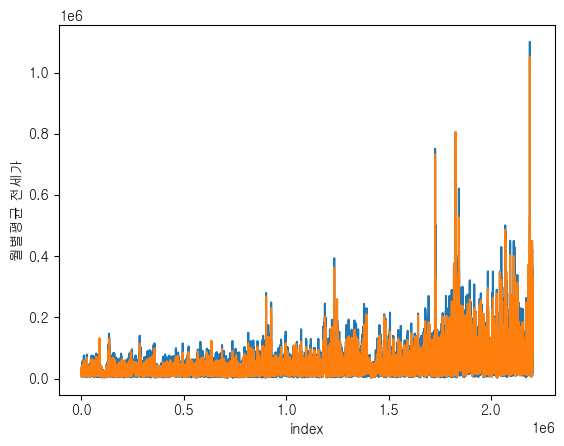

In [44]:
sns.lineplot(x='index', y='월별평균 전세가', data=X_tr.reset_index())
sns.lineplot(x='index', y='전세가 예측값', data=X_tr.reset_index())

<Axes: xlabel='index', ylabel='월별평균 전세가'>

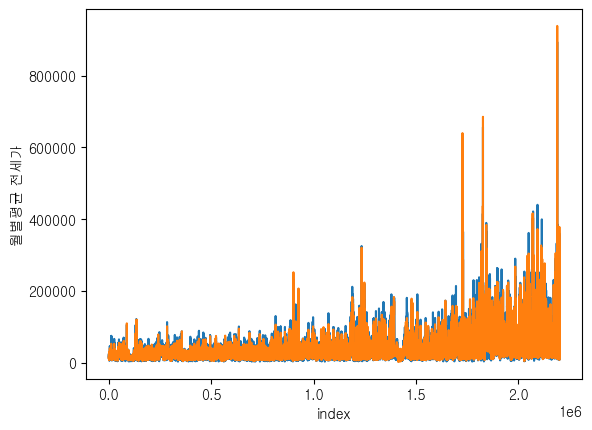

In [45]:
sns.lineplot(x='index', y='월별평균 전세가', data=X_ts.reset_index())
sns.lineplot(x='index', y='전세가 예측값', data=X_ts.reset_index())

<Axes: xlabel='index', ylabel='월별평균 매매가'>

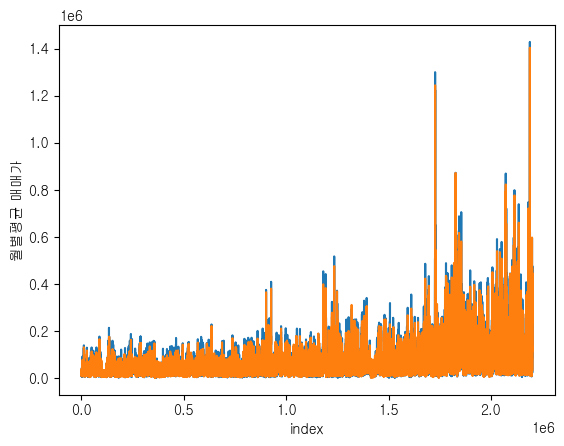

In [46]:
sns.lineplot(x='index', y='월별평균 매매가', data=X_tr.reset_index())
sns.lineplot(x='index', y='매매가 예측값', data=X_tr.reset_index())

<Axes: xlabel='index', ylabel='월별평균 매매가'>

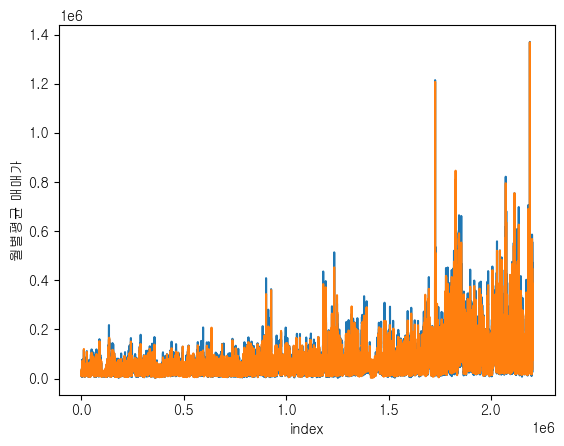

In [47]:
sns.lineplot(x='index', y='월별평균 매매가', data=X_ts.reset_index())
sns.lineplot(x='index', y='매매가 예측값', data=X_ts.reset_index())

In [71]:
result = pd.concat([X_tss, df_t.loc[df_t['계약월'] == df_t['계약월'].max()][['월별평균 전세가', '월별평균 매매가']]], axis=1)

In [72]:
result

,주소,건물명,건축년도,면적,계약월,건물용도,구,CPI,전년도동월 대비 CPI 등락률,전세수급-서울-6개월 전,매매수급-서울-6개월 전,주택담보대출 (연리%)-6개월 전,전세자금대출 (연리%)-6개월 전,미래 전세가 예측값,미래 매매가 예측값,월별평균 전세가,월별평균 매매가
90,강남구 개포동 1164-12,새롬(1164-12),2000.0,74,2025-08,아파트,강남구,113,2.1,55.3,60.6,5.3,5,42723.472656,88155.304688,35817.0,86212.0
181,강남구 개포동 1164-13,새롬(1164-13),2000.0,60,2025-08,아파트,강남구,113,2.1,55.3,60.6,5.3,5,43647.515625,95489.046875,35390.0,66382.0
272,강남구 개포동 1164-14,새롬(1164-14),2000.0,40,2025-08,아파트,강남구,113,2.1,55.3,60.6,5.3,5,22202.486328,38657.160156,17990.0,29270.0
363,강남구 개포동 1164-14,새롬(1164-14),2000.0,58,2025-08,아파트,강남구,113,2.1,55.3,60.6,5.3,5,30840.117188,60566.781250,27424.0,57300.0
454,강남구 개포동 1164-20,한림,2002.0,73,2025-08,아파트,강남구,113,2.1,55.3,60.6,5.3,5,39606.878906,62058.488281,36260.0,68051.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202251,중랑구 중화동 452-0,동구햇살아파트101동,2001.0,76,2025-08,아파트,중랑구,113,2.1,55.3,60.6,5.3,5,32501.255859,46125.406250,32773.0,51117.0
2202342,중랑구 중화동 452-0,동구햇살아파트101동,2001.0,107,2025-08,아파트,중랑구,113,2.1,55.3,60.6,5.3,5,35950.445312,54919.621094,29064.0,41632.0
2202433,중랑구 중화동 453-0,청광플러스원,2007.0,85,2025-08,아파트,중랑구,113,2.1,55.3,60.6,5.3,5,37614.746094,59472.671875,35693.0,57735.0
2202524,중랑구 중화동 454-0,동양엔파트2차,2013.0,85,2025-08,아파트,중랑구,113,2.1,55.3,60.6,5.3,5,43886.476562,73964.710938,50042.0,68082.0


In [74]:
result.loc[(result['미래 전세가 예측값'] < result['월별평균 전세가']) & (result['미래 전세가 예측값']/result['미래 매매가 예측값'] > 0.7)]

,주소,건물명,건축년도,면적,계약월,건물용도,구,CPI,전년도동월 대비 CPI 등락률,전세수급-서울-6개월 전,매매수급-서울-6개월 전,주택담보대출 (연리%)-6개월 전,전세자금대출 (연리%)-6개월 전,미래 전세가 예측값,미래 매매가 예측값,월별평균 전세가,월별평균 매매가
1436,강남구 개포동 1194-1,런던빌개포,2021.0,31,2025-08,오피스텔,강남구,113,2.1,55.3,60.6,5.3,5,38804.687500,49782.394531,39792.0,50741.0
3704,강남구 개포동 13-3,대청타워,1997.0,41,2025-08,오피스텔,강남구,113,2.1,55.3,60.6,5.3,5,25359.955078,31098.730469,26580.0,32326.0
5967,강남구 개포동 186-13,메트하임,2018.0,22,2025-08,오피스텔,강남구,113,2.1,55.3,60.6,5.3,5,21621.482422,26520.839844,23000.0,30324.0
11345,강남구 논현동 118-8,더원센트럴,2018.0,27,2025-08,아파트,강남구,113,2.1,55.3,60.6,5.3,5,31720.542969,42911.332031,34650.0,46729.0
11984,강남구 논현동 152-5,논현동대우아이빌 힐타운,2003.0,29,2025-08,오피스텔,강남구,113,2.1,55.3,60.6,5.3,5,15842.810547,21637.828125,20000.0,21471.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2190782,중랑구 신내동 648-0,디아뜨갤러리,2003.0,35,2025-08,오피스텔,중랑구,113,2.1,55.3,60.6,5.3,5,10813.731445,12937.176758,12166.0,15602.0
2198126,중랑구 중화동 208-16,더샤이닝,2019.0,17,2025-08,오피스텔,중랑구,113,2.1,55.3,60.6,5.3,5,12129.875000,13772.268555,12733.0,13169.0
2198399,중랑구 중화동 208-4,범양프레체,2012.0,18,2025-08,아파트,중랑구,113,2.1,55.3,60.6,5.3,5,9766.707031,11882.106445,10008.0,11350.0
2198490,중랑구 중화동 208-4,범양프레체,2012.0,22,2025-08,아파트,중랑구,113,2.1,55.3,60.6,5.3,5,11202.175781,14168.551758,11578.0,10964.0


In [75]:
final_result = result.loc[(result['미래 전세가 예측값'] < result['월별평균 전세가']) & (result['미래 전세가 예측값']/result['미래 매매가 예측값'] > 0.7)]

In [79]:
final_result.to_csv('final_result.csv', encoding="utf-8-sig", mode="w")

In [ ]:
--